In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

#### Getting all file names in a list using OS module in python

In [144]:
files = os.listdir("F:\Data Analytics\Kaggle_Project\Sales_EDA\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data")
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [145]:
df_final = pd.DataFrame()
for i in files:
    df = pd.read_csv("F:/Data Analytics/Kaggle_Project/Sales_EDA/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/"+i)
    df_final = pd.concat([df, df_final], ignore_index=True)


In [146]:
df_final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


## EDA

In [147]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [148]:
df_final.nunique()

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
dtype: int64

In [149]:
# Checking for null values
df_final.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [150]:
# Dropping Null values
df_final = df_final.dropna()
df_final.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [151]:
# Checking for Duplicate records in our Dataframe

df_final.duplicated().sum()

618

In [152]:
# There are some records with Column header.

df_final[df_final.Product == 'Product']   # 355 records

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3732,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3790,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4323,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
5579,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183747,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185675,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185791,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185806,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [153]:
# Filtering out Dataframe with records where Column values are not column name
df_final = df_final.loc[df_final.Product != 'Product']
df_final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
186846,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
186847,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
186848,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [154]:
# Checking for Duplicate values
df_final.duplicated().sum()

264

In [155]:
# Dropping Duplicates and keeping first record
df_final = df_final.drop_duplicates(keep='first', ignore_index=True)
df_final

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
185681,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
185682,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
185683,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
185684,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


In [156]:
# Checking dataframe info after performing Data cleaning Steps
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185686 non-null  object
 1   Product           185686 non-null  object
 2   Quantity Ordered  185686 non-null  object
 3   Price Each        185686 non-null  object
 4   Order Date        185686 non-null  object
 5   Purchase Address  185686 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [157]:
# Renaming Order ID, Quantity Ordered, Price Each, Order Date and Purchase Address Variable  (As space available is violating INC rules )
df_final = df_final.rename(columns={'Order ID':'Order_ID', 'Quantity Ordered' : 'Qty', 'Price Each':'Price', 'Order Date':'Order_Date',
                        'Purchase Address':'Purchase_Address'})
df_final

,Order_ID,Product,Qty,Price,Order_Date,Purchase_Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"
...,...,...,...,...,...,...
185681,194090,Google Phone,1,600,04/08/19 17:11,"177 Jackson St, Los Angeles, CA 90001"
185682,194091,AA Batteries (4-pack),1,3.84,04/15/19 16:02,"311 Forest St, Austin, TX 73301"
185683,194092,AAA Batteries (4-pack),2,2.99,04/28/19 14:36,"347 Sunset St, San Francisco, CA 94016"
185684,194093,AA Batteries (4-pack),1,3.84,04/14/19 15:09,"835 Lake St, Portland, OR 97035"


#### Converting Datatypes for Columns

Variables which needs to be converted
Qty ==> int,  
Price ==> Float,  
Order_Date ==> Date

In [159]:
df_final.Qty = df_final.Qty.astype(np.int64)
df_final.Price = df_final.Price.astype(float)
df_final.Order_Date = pd.to_datetime(df_final.Order_Date)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185686 entries, 0 to 185685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order_ID          185686 non-null  object        
 1   Product           185686 non-null  object        
 2   Qty               185686 non-null  int64         
 3   Price             185686 non-null  float64       
 4   Order_Date        185686 non-null  datetime64[ns]
 5   Purchase_Address  185686 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 8.5+ MB


#### Creating Some Calculated field for Further Analysis

In [160]:
# Adding Total Cost based on Qty X Price
df_final['Sales'] = df_final.Qty * df_final.Price
df_final['Month'] = df_final.Order_Date.dt.month
df_final.head()

,Order_ID,Product,Qty,Price,Order_Date,Purchase_Address,Sales,Month
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,9
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,9
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,9
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,9
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,9


#### Adding City & State Column

In [161]:
# Extracting City from Purchase_Address variable

df_final['City'] = df_final.Purchase_Address.apply(lambda x : x.split(',')[1])
df_final['State'] = df_final.Purchase_Address.str[-8:-6]
df_final

,Order_ID,Product,Qty,Price,Order_Date,Purchase_Address,Sales,Month,City,State
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",15.36,9,Los Angeles,CA
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",23.90,9,Austin,TX
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",11.95,9,Los Angeles,CA
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",149.99,9,Seattle,WA
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",11.95,9,Atlanta,GA
...,...,...,...,...,...,...,...,...,...,...
185681,194090,Google Phone,1,600.00,2019-04-08 17:11:00,"177 Jackson St, Los Angeles, CA 90001",600.00,4,Los Angeles,CA
185682,194091,AA Batteries (4-pack),1,3.84,2019-04-15 16:02:00,"311 Forest St, Austin, TX 73301",3.84,4,Austin,TX
185683,194092,AAA Batteries (4-pack),2,2.99,2019-04-28 14:36:00,"347 Sunset St, San Francisco, CA 94016",5.98,4,San Francisco,CA
185684,194093,AA Batteries (4-pack),1,3.84,2019-04-14 15:09:00,"835 Lake St, Portland, OR 97035",3.84,4,Portland,OR


In [162]:
# Sorting the Dataframe in Month order
df_final.sort_values(by= 'Month', ignore_index=True, inplace=True)
df_final.head()

,Order_ID,Product,Qty,Price,Order_Date,Purchase_Address,Sales,Month,City,State
0,144227,Macbook Pro Laptop,1,1700.00,2019-01-01 21:42:00,"774 Main St, San Francisco, CA 94016",1700.00,1,San Francisco,CA
1,150472,Apple Airpods Headphones,1,150.00,2019-01-07 22:30:00,"738 Jackson St, New York City, NY 10001",150.00,1,New York City,NY
2,150473,Wired Headphones,1,11.99,2019-01-10 09:09:00,"148 Hickory St, Boston, MA 02215",11.99,1,Boston,MA
3,150474,Bose SoundSport Headphones,1,99.99,2019-01-19 18:23:00,"817 6th St, Seattle, WA 98101",99.99,1,Seattle,WA
4,150475,Wired Headphones,1,11.99,2019-01-18 11:08:00,"971 Madison St, Atlanta, GA 30301",11.99,1,Atlanta,GA


####  Plotting Monthwise Revenue and Qty Sold

In [163]:
Monthwise_Rev = df_final.groupby('Month')[['Sales']].sum().reset_index()
Monthwise_Rev

,Month,Sales
0,1,1821413.16
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


In [121]:
Monthwise_Qty = df_final.groupby('Month')[['Qty']].sum().reset_index()
Monthwise_Qty

,Month,Qty
0,1,10893
1,2,13431
2,3,16979
3,4,20536
4,5,18653
5,6,15234
6,7,16054
7,8,13429
8,9,13091
9,10,22669


Text(0, 0.5, 'Revenue')

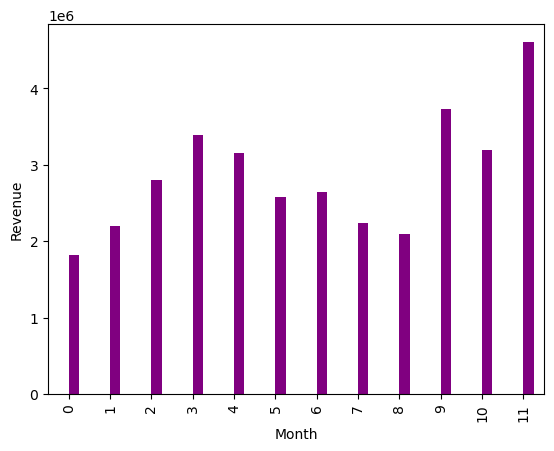

In [164]:
Monthwise_Rev.plot(kind = 'bar', color = 'purple', legend = None)
plt.xlabel('Month')
plt.ylabel('Revenue')

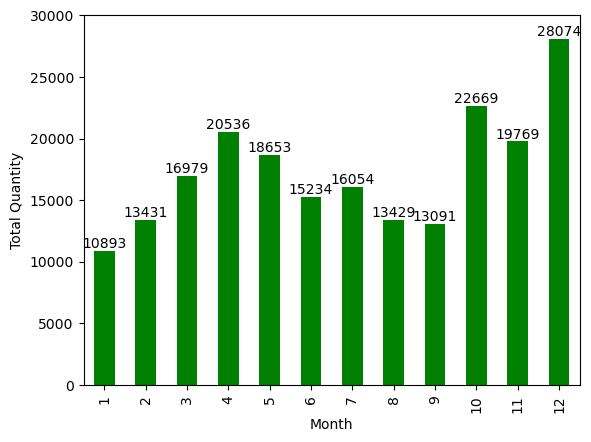

In [165]:
fig = df_final.groupby('Month')[['Qty']].sum().plot(kind = 'bar', color = 'g', legend = None)
fig.bar_label(fig.containers[0], label_type='edge')
plt.xlabel('Month')
plt.ylabel('Total Quantity')
plt.ylim(top = 30000)
plt.show()


#### Show Top 3 Months in terms of Revenue and Qty Sold

In [166]:
# Showing Top 3 Months in terms of Revenue
Monthwise_Rev.sort_values(by = 'Sales', ascending=False).head(3)

,Month,Sales
11,12,4608295.70
9,10,3734777.86
3,4,3389217.98


In [167]:
# Showing Top 3 Months in terms of Qty Sold
Monthwise_Qty.sort_values(by = 'Qty', ascending=False).head(3)

,Month,Qty
11,12,28074
9,10,22669
3,4,20536


#### Top 5 Products in terms of Revenue and Qty Sold

In [168]:
Product_Revenue = df_final.groupby('Product')[['Sales']].sum().reset_index()
Product_Qty = df_final.groupby('Product')[['Qty']].sum().reset_index()

In [169]:
# Top 5 Products in terms of Revenue
Product_Revenue.sort_values(by = 'Sales', ascending=False, ignore_index=True).head()

,Product,Sales
0,Macbook Pro Laptop,8032500.00
1,iPhone,4792900.00
2,ThinkPad Laptop,4127958.72
3,Google Phone,3317400.00
4,27in 4K Gaming Monitor,2433147.61


In [170]:
# Top 5 Most Popular Products
Product_Qty.sort_values(by = 'Qty', ascending=False, ignore_index=True).head()

,Product,Qty
0,AAA Batteries (4-pack),30986
1,AA Batteries (4-pack),27615
2,USB-C Charging Cable,23931
3,Lightning Charging Cable,23169
4,Wired Headphones,20524


#### Plotting City wise  Revenue

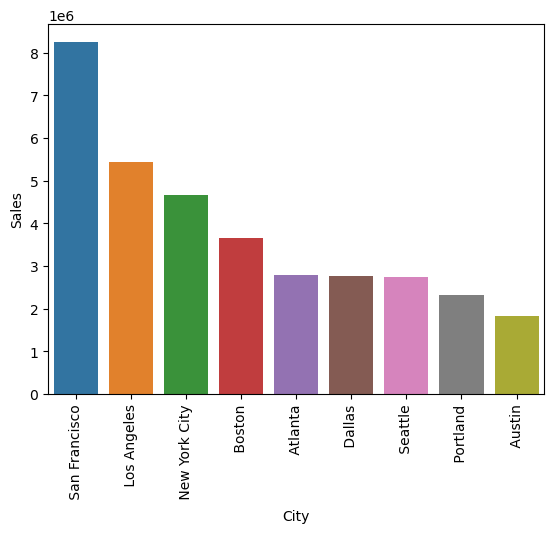

In [171]:
City_Revenue = df_final.groupby('City')[['Sales']].sum().sort_values(by = 'Sales', ascending = False).reset_index()
sns.barplot(data=City_Revenue, x = 'City', y = 'Sales')
plt.xticks(rotation = 'vertical')
plt.show()

#### Analysing Customers buying Frequency throughout day

In [175]:
df_final['Hours'] = df_final.Order_Date.dt.hour
df_final.head()

,Order_ID,Product,Qty,Price,Order_Date,Purchase_Address,Sales,Month,City,State,Hours
0,144227,Macbook Pro Laptop,1,1700.00,2019-01-01 21:42:00,"774 Main St, San Francisco, CA 94016",1700.00,1,San Francisco,CA,21
1,150472,Apple Airpods Headphones,1,150.00,2019-01-07 22:30:00,"738 Jackson St, New York City, NY 10001",150.00,1,New York City,NY,22
2,150473,Wired Headphones,1,11.99,2019-01-10 09:09:00,"148 Hickory St, Boston, MA 02215",11.99,1,Boston,MA,9
3,150474,Bose SoundSport Headphones,1,99.99,2019-01-19 18:23:00,"817 6th St, Seattle, WA 98101",99.99,1,Seattle,WA,18
4,150475,Wired Headphones,1,11.99,2019-01-18 11:08:00,"971 Madison St, Atlanta, GA 30301",11.99,1,Atlanta,GA,11


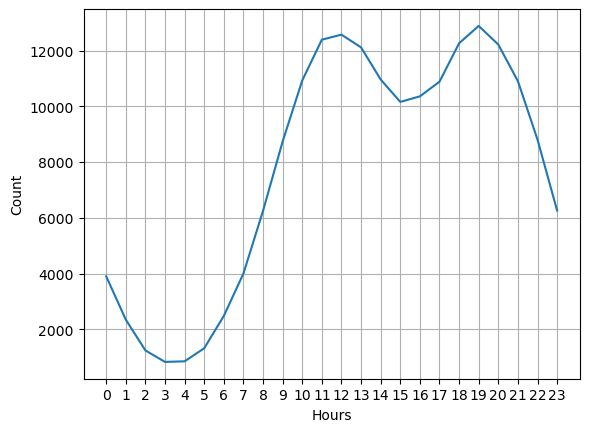

In [213]:
df_final.groupby('Hours')[['Order_ID']].count().plot(kind = 'line', legend = None)
plt.xticks(range(0, 24))
plt.ylabel('Count')
plt.grid()


In [217]:
df_final.head()

,Order_ID,Product,Qty,Price,Order_Date,Purchase_Address,Sales,Month,City,State,Hours
0,144227,Macbook Pro Laptop,1,1700.00,2019-01-01 21:42:00,"774 Main St, San Francisco, CA 94016",1700.00,1,San Francisco,CA,21
1,150472,Apple Airpods Headphones,1,150.00,2019-01-07 22:30:00,"738 Jackson St, New York City, NY 10001",150.00,1,New York City,NY,22
2,150473,Wired Headphones,1,11.99,2019-01-10 09:09:00,"148 Hickory St, Boston, MA 02215",11.99,1,Boston,MA,9
3,150474,Bose SoundSport Headphones,1,99.99,2019-01-19 18:23:00,"817 6th St, Seattle, WA 98101",99.99,1,Seattle,WA,18
4,150475,Wired Headphones,1,11.99,2019-01-18 11:08:00,"971 Madison St, Atlanta, GA 30301",11.99,1,Atlanta,GA,11


In [227]:
df1 = df_final[df_final[['Order_ID']].duplicated(keep=False)]

df1['Grouped'] = df1.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))

df1_new = df1[['Order_ID', 'Grouped']].drop_duplicates(ignore_index=True)

df1_new

C:\Users\dell\AppData\Local\Temp\ipykernel_10468\4202301330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order_ID')['Product'].transform(lambda x: ','.join(x))


,Order_ID,Grouped
0,297817,"iPhone,Lightning Charging Cable"
1,150433,"Google Phone,Flatscreen TV"
2,311386,"Apple Airpods Headphones,iPhone"
3,300519,"Bose SoundSport Headphones,Lightning Charging ..."
4,150185,"AAA Batteries (4-pack),USB-C Charging Cable"
...,...,...
6874,311630,"34in Ultrawide Monitor,AA Batteries (4-pack)"
6875,311658,"Wired Headphones,AAA Batteries (4-pack)"
6876,311697,"Vareebadd Phone,USB-C Charging Cable"
6877,311661,"Apple Airpods Headphones,27in 4K Gaming Monitor"


In [231]:
from itertools import combinations

combination_list = []
for row in df1.Grouped:
    combined = list(combinations(df1.Grouped,2))
    combination_list.append(combined)
combination_list

MemoryError: 

In [241]:
from collections import Counter

counter = Counter()
for row in df1['Grouped']:
    row_list = row.split(',')
    counter.update(combinations(row_list,2))
print(counter)  # All the 2 Product Combinations

Counter({('Google Phone', 'USB-C Charging Cable'): 1216, ('iPhone', 'Lightning Charging Cable'): 1199, ('Lightning Charging Cable', 'iPhone'): 946, ('USB-C Charging Cable', 'Google Phone'): 914, ('Google Phone', 'Wired Headphones'): 574, ('iPhone', 'Wired Headphones'): 534, ('Wired Headphones', 'iPhone'): 486, ('iPhone', 'Apple Airpods Headphones'): 455, ('Vareebadd Phone', 'USB-C Charging Cable'): 449, ('Wired Headphones', 'Google Phone'): 390, ('Apple Airpods Headphones', 'iPhone'): 370, ('USB-C Charging Cable', 'Vareebadd Phone'): 339, ('USB-C Charging Cable', 'Wired Headphones'): 334, ('Google Phone', 'Bose SoundSport Headphones'): 264, ('Bose SoundSport Headphones', 'Google Phone'): 255, ('Wired Headphones', 'USB-C Charging Cable'): 203, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 172, ('Vareebadd Phone', 'Wired Headphones'): 171, ('Wired Headphones', 'Vareebadd Phone'): 168, ('Lightning Charging Cable', 'Wired Headphones'): 168, ('Wired Headphones', 'Lightning Charg

In [243]:
counter.most_common(10)  # Top 10 Combinations

[(('Google Phone', 'USB-C Charging Cable'), 1216),
 (('iPhone', 'Lightning Charging Cable'), 1199),
 (('Lightning Charging Cable', 'iPhone'), 946),
 (('USB-C Charging Cable', 'Google Phone'), 914),
 (('Google Phone', 'Wired Headphones'), 574),
 (('iPhone', 'Wired Headphones'), 534),
 (('Wired Headphones', 'iPhone'), 486),
 (('iPhone', 'Apple Airpods Headphones'), 455),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 449),
 (('Wired Headphones', 'Google Phone'), 390)]

In [244]:
for key, value in counter.most_common(10):
    print(key,value)


('Google Phone', 'USB-C Charging Cable') 1216
('iPhone', 'Lightning Charging Cable') 1199
('Lightning Charging Cable', 'iPhone') 946
('USB-C Charging Cable', 'Google Phone') 914
('Google Phone', 'Wired Headphones') 574
('iPhone', 'Wired Headphones') 534
('Wired Headphones', 'iPhone') 486
('iPhone', 'Apple Airpods Headphones') 455
('Vareebadd Phone', 'USB-C Charging Cable') 449
('Wired Headphones', 'Google Phone') 390
